In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv('C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\DATA\\UK_foods.csv', index_col ='Unnamed: 0')

In [45]:
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


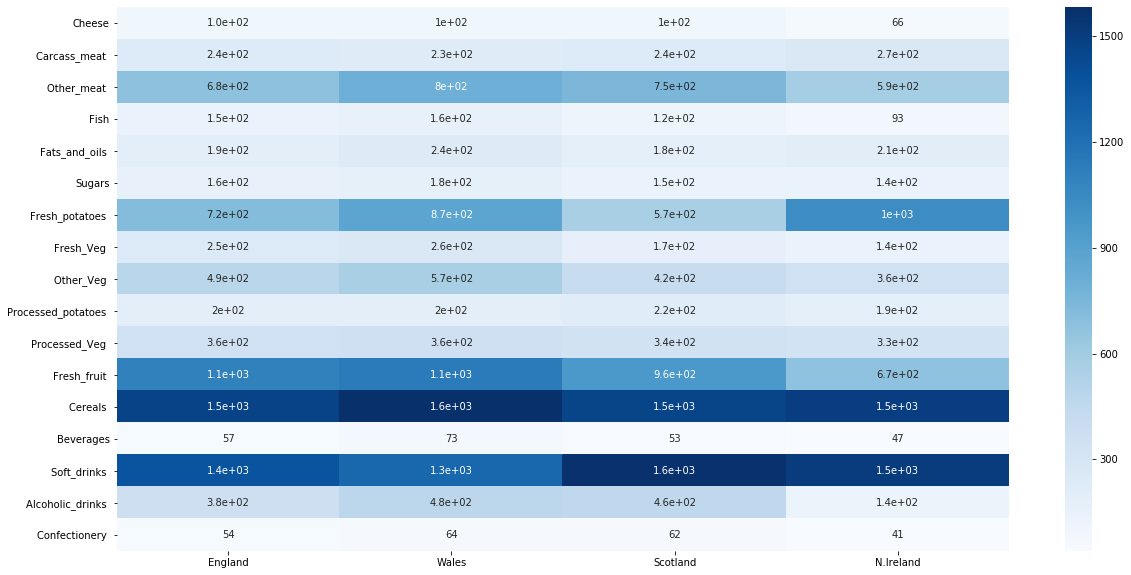

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(df, cmap ='Blues', annot=True)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [48]:
encoder = Sequential()
encoder.add(Dense(10, activation='relu', input_shape=[17]))
encoder.add(Dense(5, activation='relu'))
encoder.add(Dense(2, activation='relu'))

decoder = Sequential()
decoder.add(Dense(5, activation='relu', input_shape=[2]))
decoder.add(Dense(10, activation='relu'))
decoder.add(Dense(17, activation='relu'))

In [49]:
autoencoder = Sequential([encoder,decoder])

autoencoder.compile(loss='mse', optimizer = SGD(lr = 1.2))

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.transpose().values)

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'loss', patience = 2)

In [56]:
autoencoder.fit(scaled_df,scaled_df,epochs=20,callbacks=[early_stopping])

Train on 4 samples
Epoch 1/20
4/4 [==============================] - 0s 2ms/sample - loss: 0.2419
Epoch 2/20
4/4 [==============================] - 0s 997us/sample - loss: 0.1729
Epoch 3/20
4/4 [==============================] - 0s 1ms/sample - loss: 0.1711
Epoch 4/20
4/4 [==============================] - 0s 746us/sample - loss: 0.1702
Epoch 5/20
4/4 [==============================] - 0s 997us/sample - loss: 0.1723
Epoch 6/20
4/4 [==============================] - 0s 997us/sample - loss: 0.1800


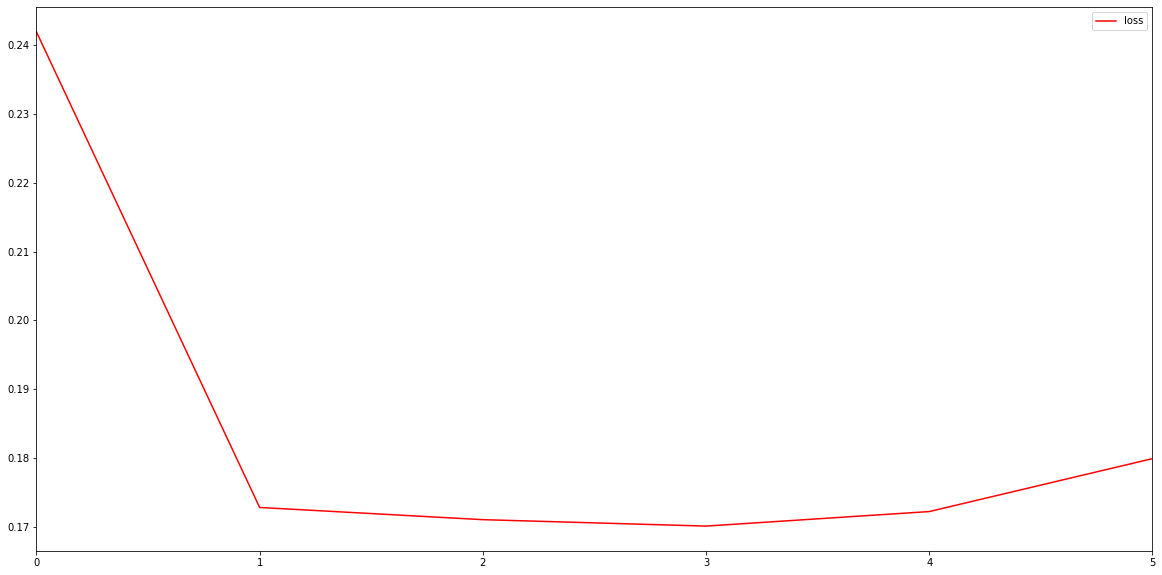

In [60]:
loss=pd.DataFrame(autoencoder.history.history)
loss.plot(figsize=(20,10),color='r')

In [61]:
encoded_2dim = encoder.predict(scaled_df)
encoded_2dim

array([[1.1749971 , 0.        ],
       [1.561408  , 0.        ],
       [0.63888454, 0.        ],
       [0.00855098, 0.        ]], dtype=float32)

In [64]:
df.columns

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [81]:
result = pd.DataFrame(data=encoded_2dim,
                     index = df.columns,
                     columns =['C1','C2'])

In [82]:
result = result.reset_index()
result

,index,C1,C2
0,England,1.174997,0.0
1,Wales,1.561408,0.0
2,Scotland,0.638885,0.0
3,N.Ireland,0.008551,0.0


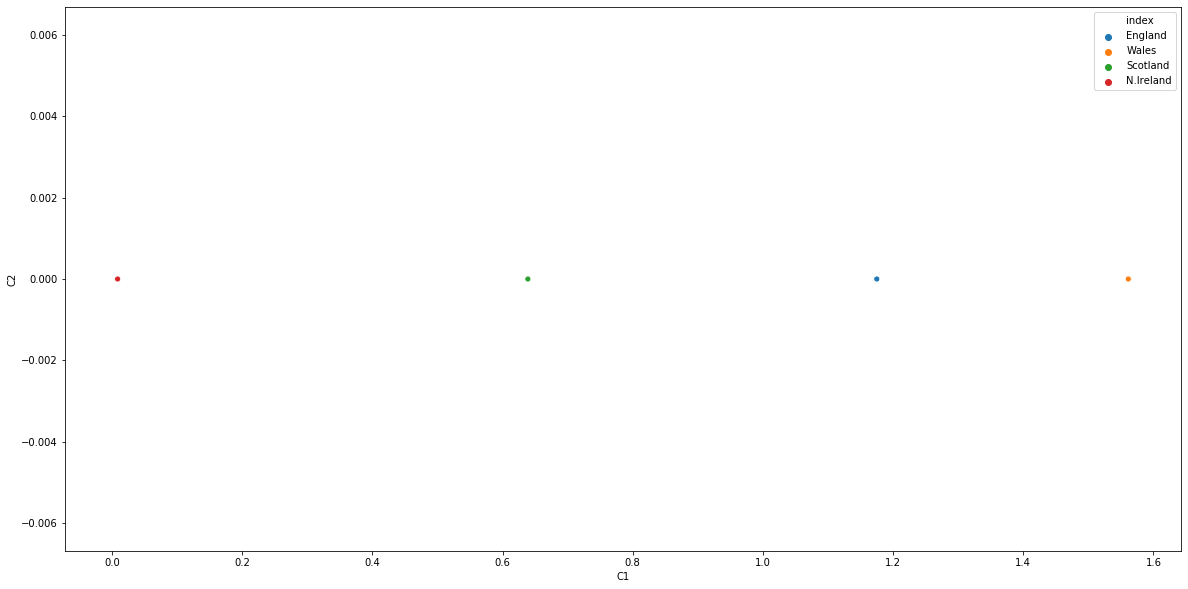

In [84]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='C1',y='C2',data=result,hue='index')